In [1]:
import torch
import torchvision
from alae import ALAE
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(
    '/files/',
    train=True,
    download=True,
    transform=transform
)

mnist_test = torchvision.datasets.MNIST(
    '/files/',
    train=False,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
alae = ALAE()
count = 0

In [4]:
# epochs = 50
# train_hist = alae.fit(train_loader, epochs = epochs)
# count += epochs
# print(count)
# torch.save(alae.state_dict(), './test.pt')

In [5]:
alae.load_state_dict(torch.load('./test.pt', map_location=device))
alae.eval()
print()

In [6]:
idxA, idxB = 1, 2
_, (img_tensors, target) = next(enumerate(test_loader))
flat_img = torch.reshape(img_tensors, (-1, 784))
eye = torch.tensor(np.eye(10)[target], dtype=torch.float)
nn_input = torch.cat([flat_img, eye], dim=-1).to(device)

latentA = alae.encoder(nn_input[idxA: idxA + 1])
gen_imgA = alae.generator(latentA).detach().cpu().numpy()[0, :784].reshape(28, 28)
latentB = alae.encoder(nn_input[idxB: idxB + 1])
gen_imgB = alae.generator(latentB).detach().cpu().numpy()[0, :784].reshape(28, 28)

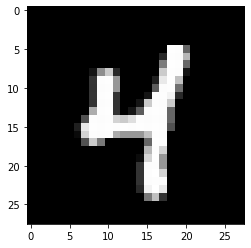

In [7]:
plt.imshow(np.clip(img_tensors[idxA: idxA + 1], 0, 1)[0][0], cmap='gray')

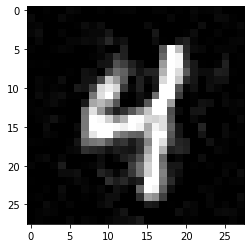

In [8]:
plt.imshow(np.clip(gen_imgA, 0, 1), cmap='gray')

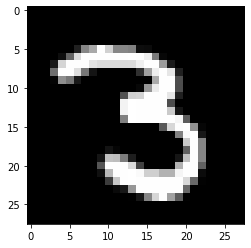

In [9]:
plt.imshow(np.clip(img_tensors[idxB: idxB + 1], 0, 1)[0][0], cmap='gray')

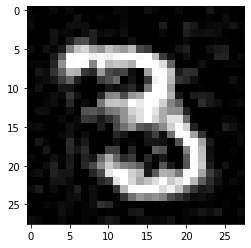

In [10]:
plt.imshow(np.clip(gen_imgB, 0, 1), cmap='gray')

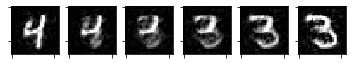

In [11]:
num = 5
delta = (latentB - latentA) / num
fig, axs = plt.subplots(1, num + 1)

latent = latentA.clone()
for i in range(num + 1):
    image = alae.generator(latent).detach().cpu().numpy()[0, :784].reshape(28, 28)
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(np.clip(image, 0, 1), cmap='gray')
    latent += delta

plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)

In [12]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


def update(factor):
    latent = latentA.clone()
    image = alae.generator(latent + delta * factor).detach().cpu().numpy()[0, :784].reshape(28, 28)
    plt.imshow(np.clip(image, 0, 1), cmap='gray')

interact(update, factor = widgets.FloatSlider(value=0, min=0, max=num + 1, step=1))

interactive(children=(FloatSlider(value=0.0, description='factor', max=6.0, step=1.0), Output()), _dom_classes…

<function __main__.update(factor)>